# 用Seaborn做数据可视化

虽然 `Matplotlib` 已经证明了自己绝对是一款超级实用且流行的数据可视化工具，但是即使骨灰粉也不得不承认它不支持的功能还有很多。  
`Matplotlib` 的三条主要“罪状”总结如下。
- `Matplotlib 2.0` 之前版本的默认配置样式绝对不是用户的最佳选择。之前的默认样式还是仿照 `1999` 年前后的 `MATLAB`，却一直在使用。
- `Matplotlib` 的 `API` 比较底层。虽然可以实现复杂的统计数据可视化，但是通常都需要写大量的样板代码（`boilerplate code`）。
- 由于 `Matplotlib` 比 `Pandas` 早十几年，因此它并不是为 `Pandas` 的 `DataFrame` 设计的。为了实现 `Pandas` 的 `DataFrame` 数据的可视化，你必须先提取每个 `Series`，然后通常还需要将它们合并成适当的格式。如果有一个画图程序库可以智能地使用 `DataFrame` 的标签画图，那一定会很棒。

这些问题的终结者就是 `Seaborn`（<http://seaborn.pydata.org>）。`Seaborn` 在 `Matplotlib` 的基础上开发了一套 `API`，为默认的图形样式和颜色设置提供了理智的选择，为常用的统计图形定义了许多简单的高级函数，并与 `Pandas DataFrame` 的功能有机结合。  
说实话，`Matplotlib` 团队也一直在努力解决这些问题：现在 `Matplotlib` 中不仅增加了 `plt.style` 工具（详情请参见 4.13 节），而且与 `Pandas` 数据也可以无缝衔接。  
`Matplotlib 2.0` 版已经带有对之前样式优化过的样式表。但是即使 `Matplotlib` 已经有了这些进步，`Seaborn` 仍然是一款非常好用的附加组件。

In [1]:
import numpy as np
import pandas as pd

## 1. Seaborn与Matplotlib

In [2]:
# 创建一些数据
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

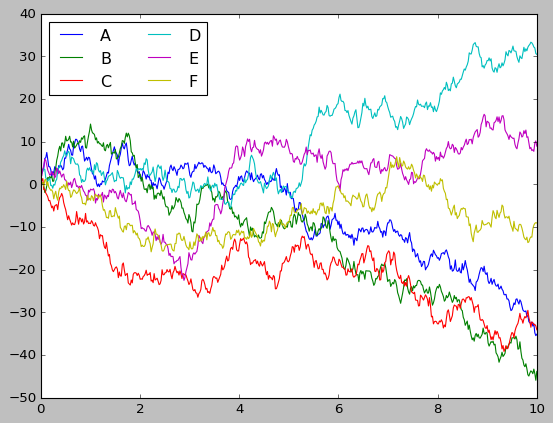

In [3]:
# 用Matplotlib默认样式画图
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

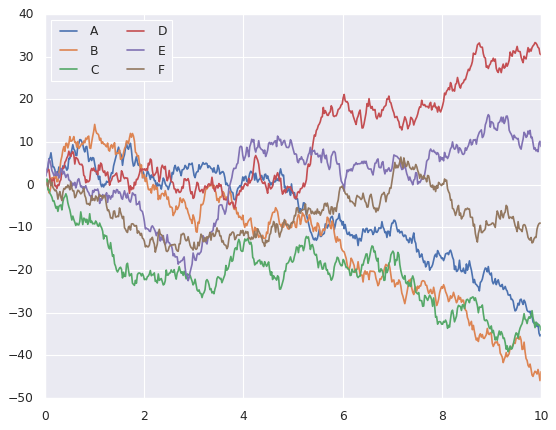

In [4]:
# 同样的画图代码
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## 2. Seaborn图形介绍

`Seaborn` 的主要思想是用高级命令为统计数据探索和统计模型拟合创建各种图形。  
下面将介绍一些 `Seaborn` 中的数据集和图形类型。虽然所有这些图形都可以用 `Matplotlib` 命令实现（其实 `Matplotlib` 就是 `Seaborn` 的底层），但是用 `Seaborn API` 会更方便。

### 2.1. 频次直方图、KDE和密度图

在进行统计数据可视化时，我们通常想要的就是频次直方图和多变量的联合分布图。在 `Matplotlib` 里面我们已经见过，相对比较简单：

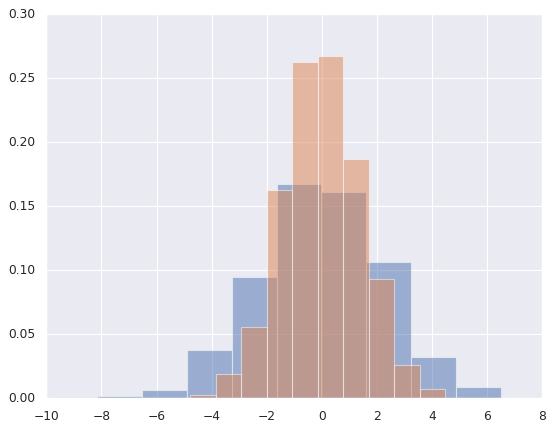

In [5]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    # plt.hist(data[col], normed=True, alpha=0.5)  # AttributeError: 'Rectangle' object has no property 'normed'
    plt.hist(data[col], density=True, alpha=0.5)

除了频次直方图，我们还可以用 `KDE` 获取变量分布的平滑估计。 `Seaborn` 通过 `sns.kdeplot` 实现：

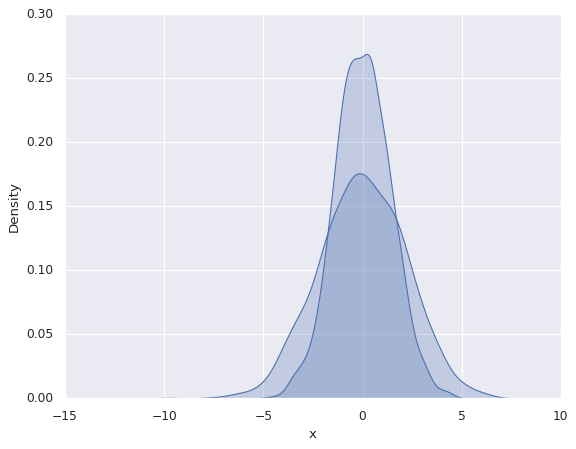

In [6]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

用 `distplot` 可以让频次直方图与 `KDE` 结合起来：

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

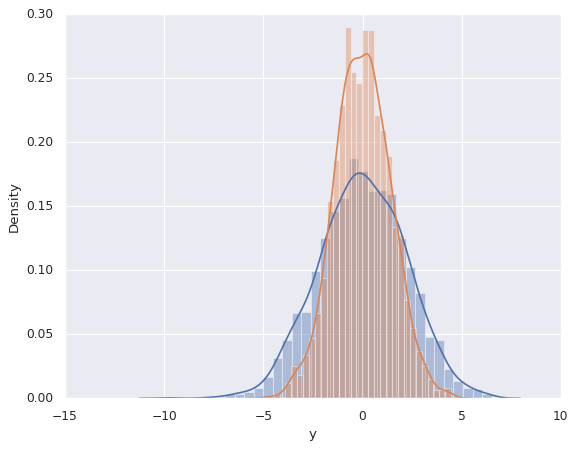

In [7]:
# FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 
# Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
sns.distplot(data['x'])
sns.distplot(data['y'])
# sns.histplot(data['x'])
# sns.histplot(data['y'])

如果向 `kdeplot` 输入的是二维数据集，那么就可以获得一个二维数据可视化图：

<AxesSubplot:xlabel='x', ylabel='y'>

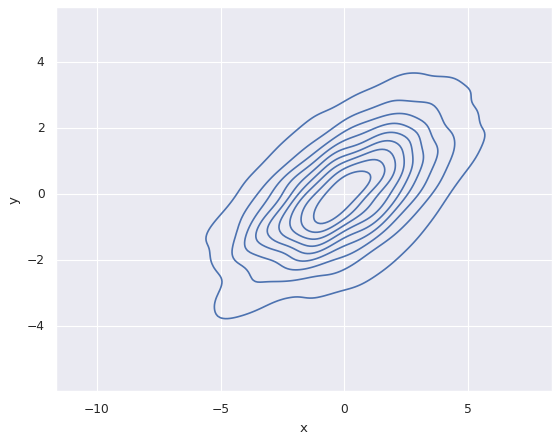

In [8]:
# sns.kdeplot(data)  # ValueError: If using all scalar values, you must pass an index
sns.kdeplot(data=data, x='x', y='y')

用 `sns.jointplot` 可以同时看到两个变量的联合分布与单变量的独立分布。在这个图形中，使用白色背景：

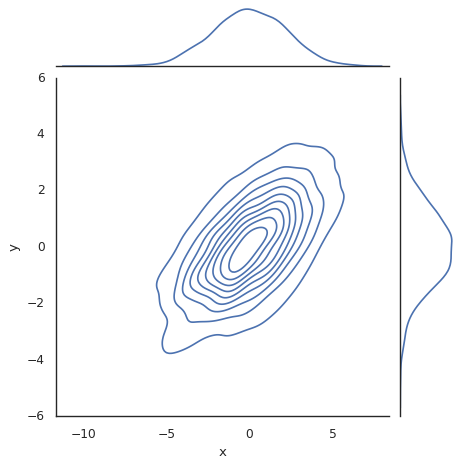

In [9]:
with sns.axes_style('white'):
    sns.jointplot(x='x', y='y', data=data, kind='kde')

可以向 `jointplot` 函数传递一些参数。例如，可以用六边形块代替频次直方图：

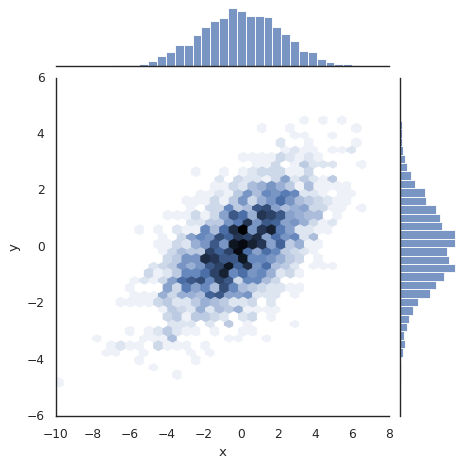

In [10]:
with sns.axes_style('white'):
    sns.jointplot(x='x', y='y', data=data, kind='hex')

### 2.2. 矩阵图

当你需要对多维数据集进行可视化时，最终都要使用矩阵图（`pair plot`）。如果想画出所有变量中任意两个变量之间的图形，用矩阵图探索多维数据不同维度间的相关性非常有效。

In [11]:
# 下面将用著名的鸢尾花数据集来演示，其中有三种鸢尾花的花瓣与花萼数据：
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# 将数据本地保存一份
# iris.to_csv('../data/seaborn_iris.csv')

可视化样本中多个维度的关系非常简单，直接用 `sns.pairplot` 即可：

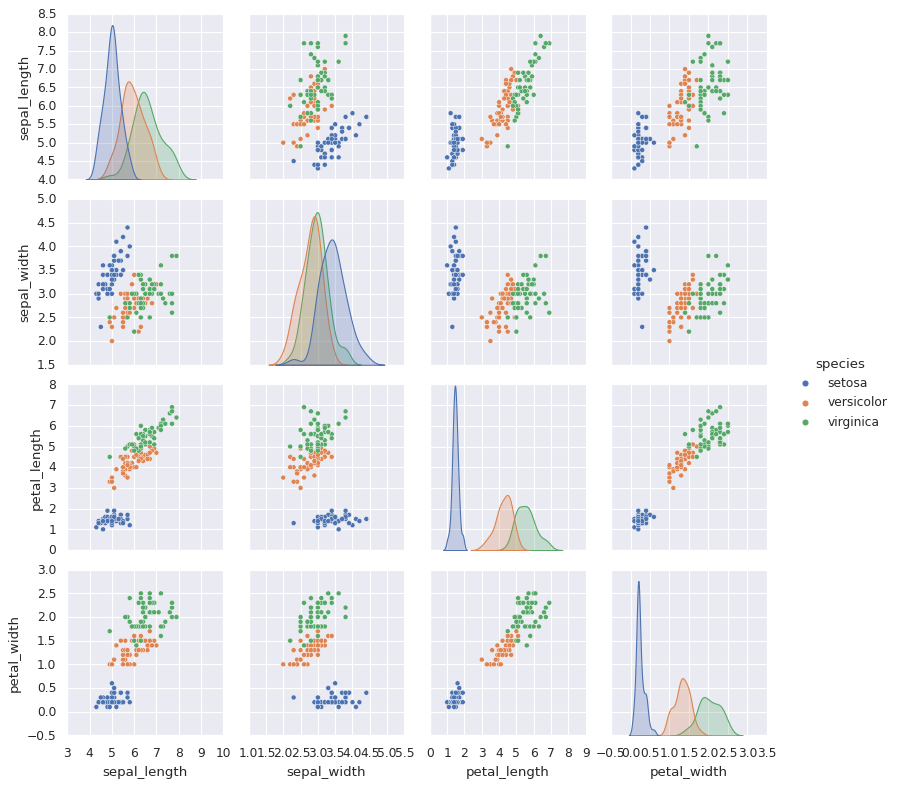

In [13]:
# sns.pairplot(iris, hue='species', size=2.5)  # UserWarning: The `size` parameter has been renamed to `height`; please update your code.
sns.pairplot(iris, hue='species', height=2.5)

### 2.3. 分面频次直方图

有时观察数据最好的方法就是借助数据子集的频次直方图。`Seaborn` 的 `FacetGrid` 函数让这件事变得非常简单。

In [14]:
# 某个餐厅统计的服务员收取小费的数据
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
# 将数据本地保存一份
# tips.to_csv('../data/seaborn_tips.csv')

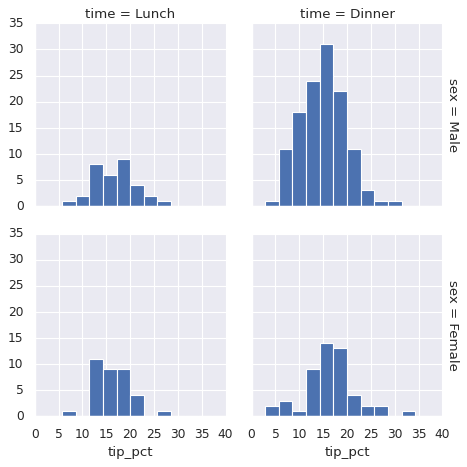

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

### 2.4. 因子图

因子图（`factor plot`）也是对数据子集进行可视化的方法。你可以通过它观察一个参数在另一个参数间隔中的分布情况：

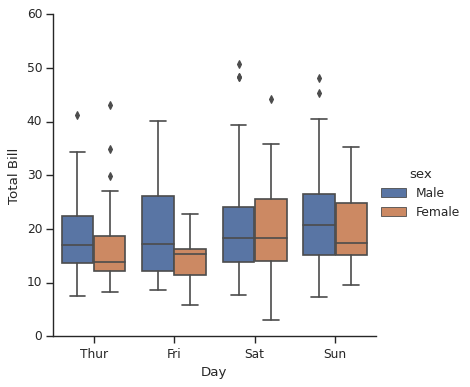

In [17]:
with sns.axes_style(style='ticks'):
    # g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")  # UserWarning: The `factorplot` function has been renamed to `catplot`. 
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

### 2.5. 联合分布

与前面介绍的矩阵图类似，可以用 `sns.jointplot` 画出不同数据集的联合分布和各数据本身的分布：

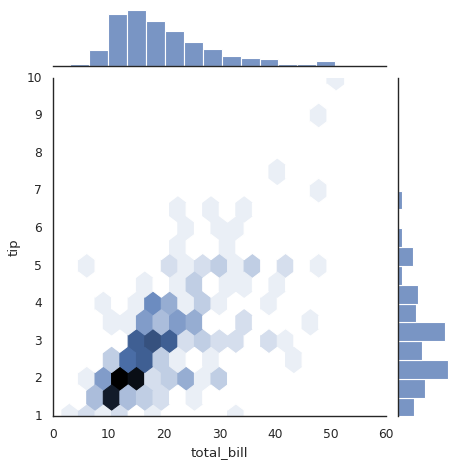

In [18]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

联合分布图也可以自动进行 `KDE` 和回归：

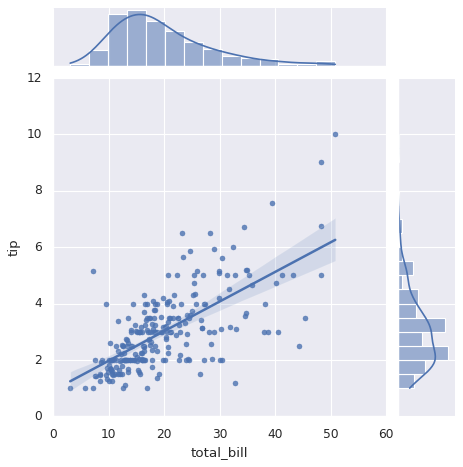

In [19]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

### 2.6. 条形图

时间序列数据可以用 `sns.factorplot` 画出条形图。

In [20]:
# 我们将用 3.9 节中的行星数据来演示：
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [21]:
# 将数据本地保存一份，已经保存过了
# planets.to_csv('../data/seaborn_planets.csv')

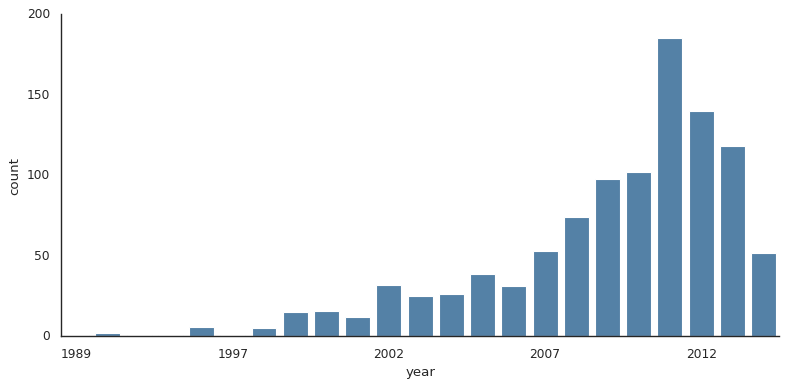

In [22]:
with sns.axes_style('white'):
    # g = sns.factorplot("year", data=planets, aspect=2, kind="count", color='steelblue')  # UserWarning: The `factorplot` function has been renamed to `catplot`.
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

我们还可以对比用不同方法（`method` 参数）发现行星的数量：

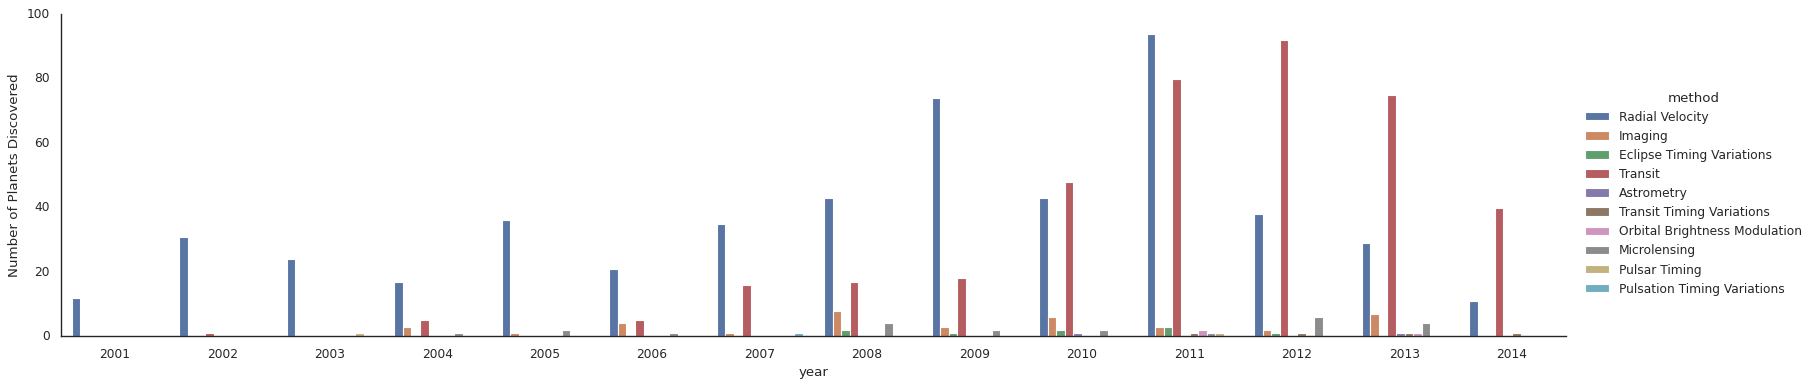

In [23]:
with sns.axes_style('white'):
    # g = sns.factorplot("year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))  # UserWarning: The `factorplot` function has been renamed to `catplot`.
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## 3. 案例：探索马拉松比赛成绩数据

In [24]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv
data = pd.read_csv('../data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [25]:
data.dtypes  # 默认情况下，Pandas 会把时间列加载为 Python 字符串格式（类型是object）

age        int64
gender    object
split     object
final     object
dtype: object

In [26]:
# 写一个把字符串转换成时间类型的函数
import datetime
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    # return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)  # AttributeError: module 'pandas' has no attribute 'datetools'
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('../data/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [27]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [28]:
# 这样看着好多了。为了能使用 Seaborn 画图，还需要添加两列，将时间换算成秒：
# casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
# data['split_sec'] = data['split'].astype(int) / 1E9
# data['final_sec'] = data['final'].astype(int) / 1E9
data['split_sec'] = data['split'].view(int) / 1E9
data['final_sec'] = data['final'].view(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


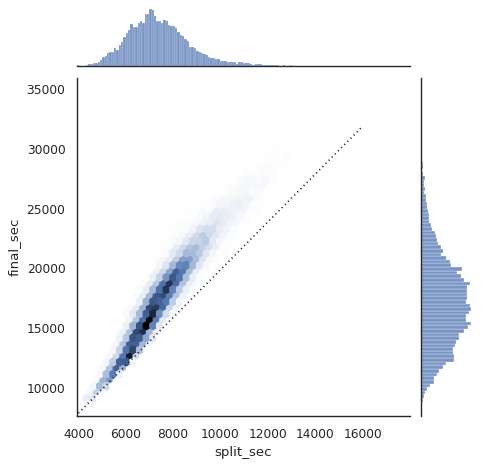

In [29]:
# 现在可以通过 jointplot 函数画图，从而对数据有个认识：
# 图中的实点线表示一个人全程保持一个速度跑完马拉松，即上半程与下半程耗时相同。然而实际的成绩分布表明，绝大多数人都是越往后跑得越慢（也符合常理）。
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [30]:
# 创建一列（split_frac，split fraction）来表示前后半程的差异，衡量比赛选手后半程加速或前半程加速的程度：
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


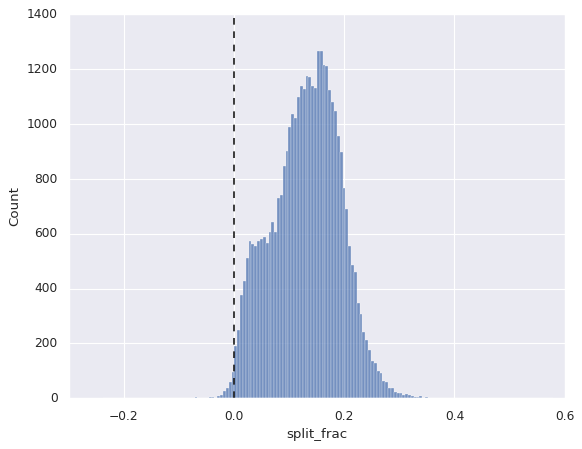

In [31]:
# 如果前后半程差异系数（split difference）小于 0，就表示这个人是后半程加速型选手。让我们画出差异系数的分布图
# FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 
# Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
# sns.distplot(data['split_frac'], kde=False)
sns.histplot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--")

In [32]:
sum(data.split_frac < 0)  # 在大约 4 万名马拉松比赛选手中，只有 250 个人能做到后半程加速。

251

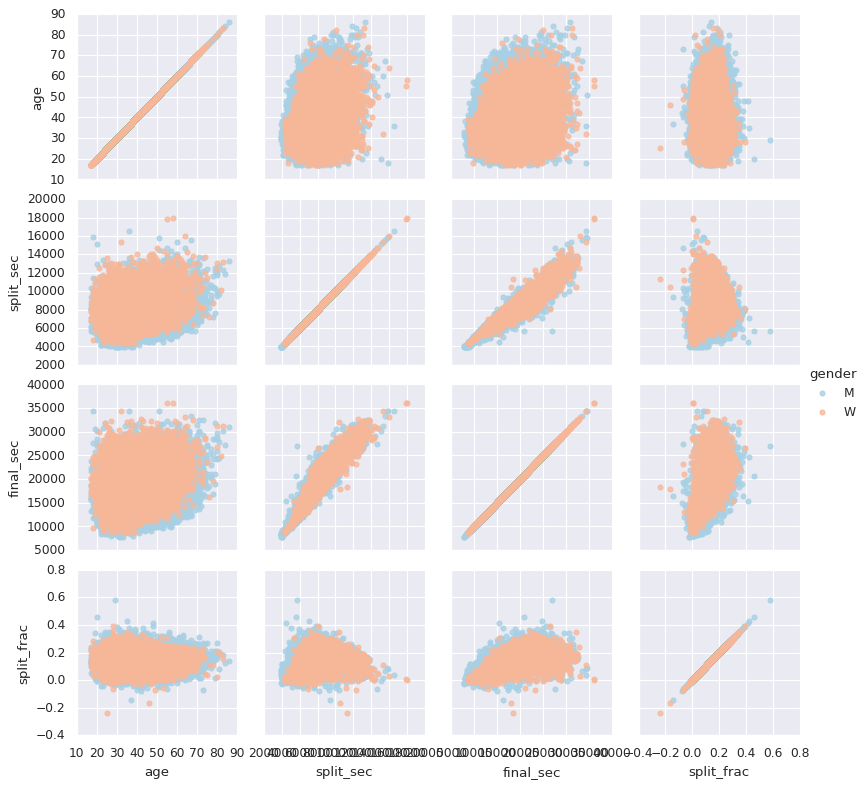

In [33]:
# 再来看看前后半程差异系数与其他变量有没有相关性。用一个矩阵图 pairgrid 画出所有变量间的相关性：
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

# 从图中可以看出，虽然前后半程差异系数与年龄没有显著的相关性，但是与比赛的最终成绩有显著的相关性：全程耗时最短的选手，往往都是在前后半程尽量保持节奏一致、耗时非常接近的人。

Text(0.5, 0, 'split_frac')

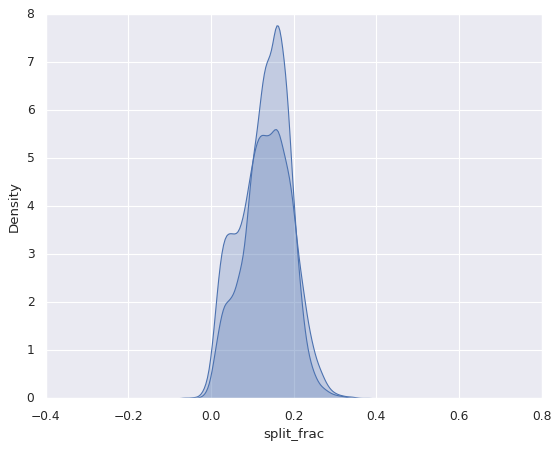

In [34]:
# 对比男女选手之间的差异是件有趣的事情。来看这两组选手前后半程差异系数的频次直方图：
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')

# 有趣的是，在前后半程耗时接近的选手中，男选手比女选手要多很多！男女选手的分布看起来几乎都是双峰分布。

<AxesSubplot:xlabel='gender', ylabel='split_frac'>

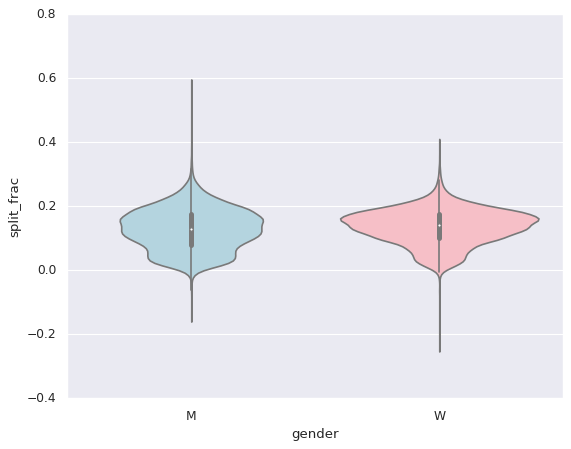

In [35]:
# 我们将男女选手不同年龄（age）的分布函数画出来，看看会得到什么启示
# 用小提琴图（violin plot）进行这两种分布的对比是个不错的办法
sns.violinplot(x="gender", y="split_frac", data=data, palette=["lightblue", "lightpink"])

In [36]:
# 让我们再仔细看看这幅图，对比两个由年龄构成函数的小提琴图。在数组中创建一个新列，表示每名选手的年龄段：
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


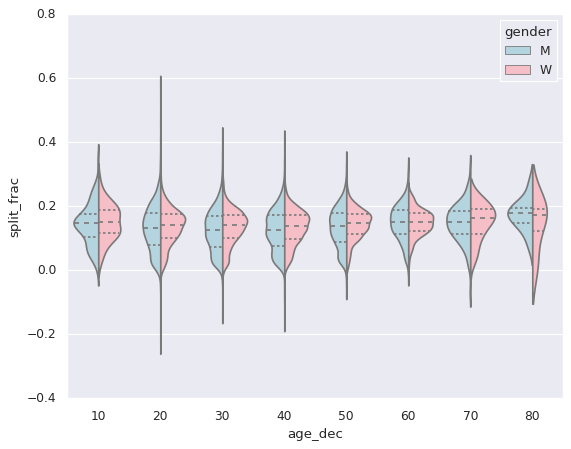

In [37]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data, split=True, inner="quartile", palette=["lightblue", "lightpink"])
    
# 通过下图可以看出男女选手的分布差异：20 多岁至 50 多岁各年龄段的男选手的前后半程差异系数概率密度都比同年龄段的女选手低一些（或者可以说任意年龄都如此）。
# 还有一个令人惊讶的地方是，所有八十岁以上的女选手都比同年龄段的男选手的表现好。这可能是由于这个年龄段的选手寥寥无几，样本太少。

In [38]:
(data.age > 80).sum()

7

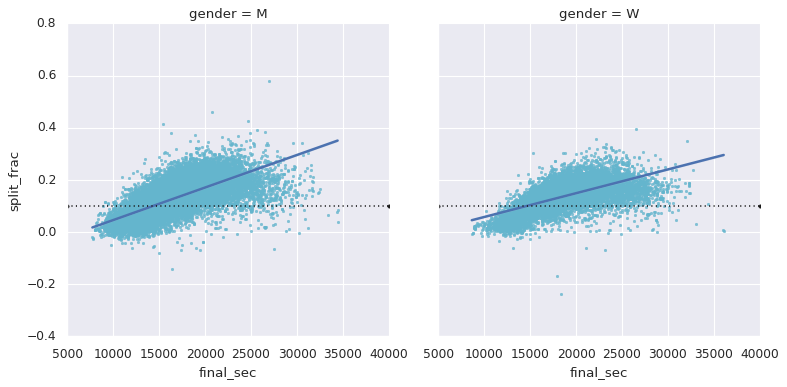

In [39]:
# 让我们再看看后半程加速型选手的数据：他们都是谁？前后半程差异系数与比赛成绩正相关吗？
# 我们可以轻松画出图形。下面用 regplot 为数据自动拟合一个线性回归模型：
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")

# 似乎有显著后半程加速的选手都是比赛成绩在 15 000 秒，即 4 小时之内的种子选手。低于这个成绩的选手很少有显著的后半程加速。